#Compilado Datos

A continuación se realiza un pequeño compilado de datos y se exhiben algunas tablas que podrían llegar a ser de utilidad.

##Explicación de los Archivos:



*   **DAP_POR_BANCO (MÁS INTERESES).xlsx:**

  Este archivo presenta los saldos en pesos chilenos de los depósitos a plazo de personas + instituciones en total de cada banco (incluyendo los intereses).

*   **DAP_SISTÉMICO.xlsx:**

  Este archivo presenta los saldos en pesos chilenos de los depósitos a plazo(sin intereses) del sistema bancario, que incluye, los dap con plazo <1, >1 año y dap personas .

*   **GASTO DEL PIB (gasto hogares e inversión).xlsx:**

  Este archivo detalla el gasto de los hogares como fracción del PIB y cuánto se destina a inversión del PIB.

*   **IMCE.xlsx:**

  Este archivo presenta el índice de expectativas económicas, que permite analizar la mirada del futuro del país en crecimiento económico por parte de las empresas.

*   **IPEC.xlsx:**

  Este archivo presenta el índice de percepción de la economía, que permite analizar la mirada del presente y futuro del país por parte de los consumidores.

*    **Indicador IMACEC.xls:**

  Este archivo presenta el índice mensual de actividad económica, que representa una estimación de la actividad económica del país en un determinado mes, a precios del año anterior. Su variación interanual constituye una aproximación de la evolución del PIB, por lo que al ser mensual es una aproximación granular de éste.

*   **Indicador IPC.xls:**

  Este archivo presenta el índice de precios al consumidor, que es un índice representativo de la inflación. De este modo, si un depósito a plazo tiene una tasa mensual mayor al IPC esto significa que las personas logran hacer valer su dinero más de lo que pierden como valor del mismo producto de la inflación (tiene rentabilidad positiva). Por otro lado, si el IPC es mayor significa que el DAP no logra cubrirlos de la inflación. Esto es algo que las personas toman mucho en cuenta a la hora de elegir este producto.

*   **Indicador PIB.xls:**

  Este archivo muestra los saldos anuales del PIB (sirve más ver la variación del PIB, o mejor aún una estimación mensual como el IMACEC), sin embargo si se toman análisis anuales el PIB es útil como variable asociada al ingreso de las personas y por ende que aportaría a una mayor demanda de depósitos a plazo.

*   **TPM.xlsx:**

  La Tasa de Política Monetaria tiene un efecto que busca mantener estable la inflación en un rango estimado por el Banco Central. Este influencia frenando o acelerando la actividad económica del país, ya que influencia en las tasas de captación y colocación de los bancos, y por ende al subir esta tasa incentiva el ahorro (y la utilización de instrumentos de ahorro como los DAP) y al bajarse la TPM baja la rentabilidad de los DAP y se incentiva el consumo.

*   **Tasas medias de captación.xlsx:**

  Promedio de tasas de captación de los bancos a nivel mensual.

*   **VARIACIÓN IMACEC.xlsx:**

  Variación del índice mensual de actividad económica. Este permite analizar de forma mensual lo que haría la variación del PIB a nivel de ingresos.

*   **variación PIB.xlsx:**

  Variación del Producto Interno Bruto. Este permite tener un alcance anual del crecimiento económico del país y que se reflejaría supuestamente en mayores ingresos para las personas.




##Código General:

In [1]:
#librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

##Archivos:

###DAP POR BANCO (MÁS INTERESES)

In [2]:
archivo = '/content/DAP_POR_BANCO (MÁS INTERESES).xlsx'
df = pd.read_excel(archivo, sheet_name='cmf')
df.head(15)

,periodo,id_institucion,nombre_institucion,id_cuenta,saldo_clp,saldo_clf,saldo_usd,saldo_mxn,saldo_total
0,202201,1,BANCO DE CHILE,242000100,6721314119768,535663363701,0,1182449195517,8439426678986
1,202201,9,BANCO INTERNACIONAL,242000100,812212136215,62760857886,0,259853549056,1134826543157
2,202201,12,BANCO DEL ESTADO DE CHILE,242000100,4463301996029,297202280043,0,1154315335566,5914819611638
3,202201,14,SCOTIABANK CHILE,242000100,6242276660834,40198826926,0,3002165666757,9284641154517
4,202201,16,BANCO DE CREDITO E INVERSIONES,242000100,5736280425807,57713476722,0,4714904342559,10508898245088
5,202201,28,BANCO BICE,242000100,1611930687465,556502945435,0,274359225313,2442792858213
6,202201,31,HSBC BANK CHILE,242000100,188755866698,17482286125,0,410819918078,617058070901
7,202201,37,BANCO SANTANDER-CHILE,242000100,6895876542517,135091917769,0,2367918452962,9398886913248
8,202201,39,BANCO ITAU,242000100,6120452190810,562755223918,1197466,3132801526825,9816010139019
9,202201,41,JP MORGAN CHASE BANK N.A.,242000100,49228326388,0,0,0,49228326388


####Como Bancos en Conjunto

In [3]:
#Eliminamos 'Total Sistema Financiero'
df =  df[df['id_institucion'] != 999]

#arrays utiles
saldo_clp = []
saldo_clf = []
saldo_usd = []
saldo_mxn = []
saldo_total  = []

gen = [saldo_clp, saldo_clf, saldo_usd, saldo_mxn, saldo_total]
mon_nam = ['CLP','CLF','USD','MXN','Total']

#recolectamos datos
for per in df['periodo'].unique():
    aux = df[df['periodo'] == per].sum()
    saldo_clp.append(aux[4])
    saldo_clf.append(aux[5])
    saldo_usd.append(aux[6])
    saldo_mxn.append(aux[7])
    saldo_total.append(aux[8])

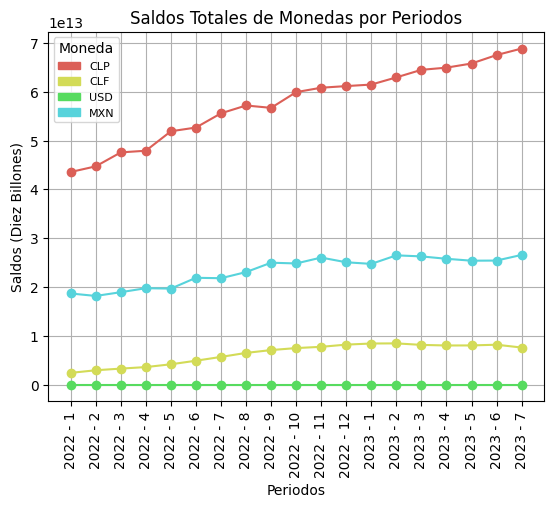

In [4]:
#fig = plt.figure(figsize=(10, 7))
palette = sns.color_palette("hls", 6)
colec = []
i = 0
per = [f'{per//100} - {per%100}' for per in df['periodo'].unique()]
for cat in gen[:4]:
    plt.plot(per, cat, marker = 'o',  color = palette[i])
    colec.append( mpatches.Patch(color = palette[i], label=mon_nam[i]))
    i += 1

plt.legend(handles=colec, fontsize="8", title= "Moneda")
plt.title("Saldos Totales de Monedas por Periodos") # agregar titulo
plt.xlabel('Periodos') # nombre eje x
plt.ylabel('Saldos (Diez Billones)') # nombre eje y
plt.xticks(rotation=90);
plt.grid()
plt.show()

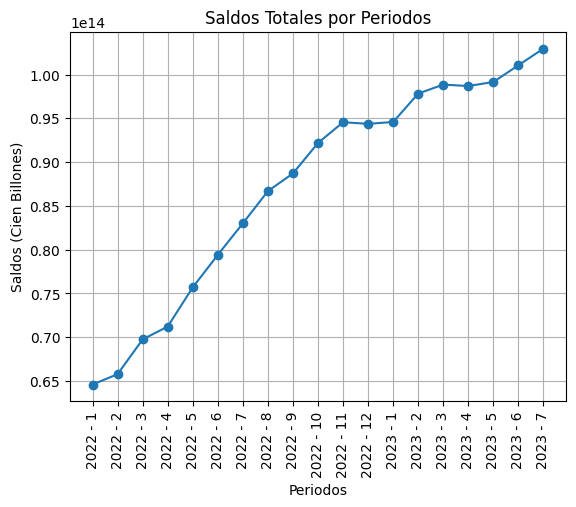

In [5]:
plt.plot(per,saldo_total, marker = 'o')
plt.title("Saldos Totales por Periodos") # agregar titulo
plt.xlabel('Periodos') # nombre eje x
plt.ylabel('Saldos (Cien Billones)') # nombre eje y
plt.xticks(rotation=90);
plt.grid()
plt.show()

####Como Bancos Independientes

In [6]:
#Eliminamos 'Total Sistema Financiero'
df =  df[df['id_institucion'] != 999]

#nombres de los bancos
bancos = [bnc for bnc in df['nombre_institucion'].unique()]
d_bcn = {}

#recolectamos datos
new_df = df.groupby('nombre_institucion')
for nom_bcn, fila in new_df:
    d_bcn[nom_bcn] = pd.array(fila['saldo_total'])

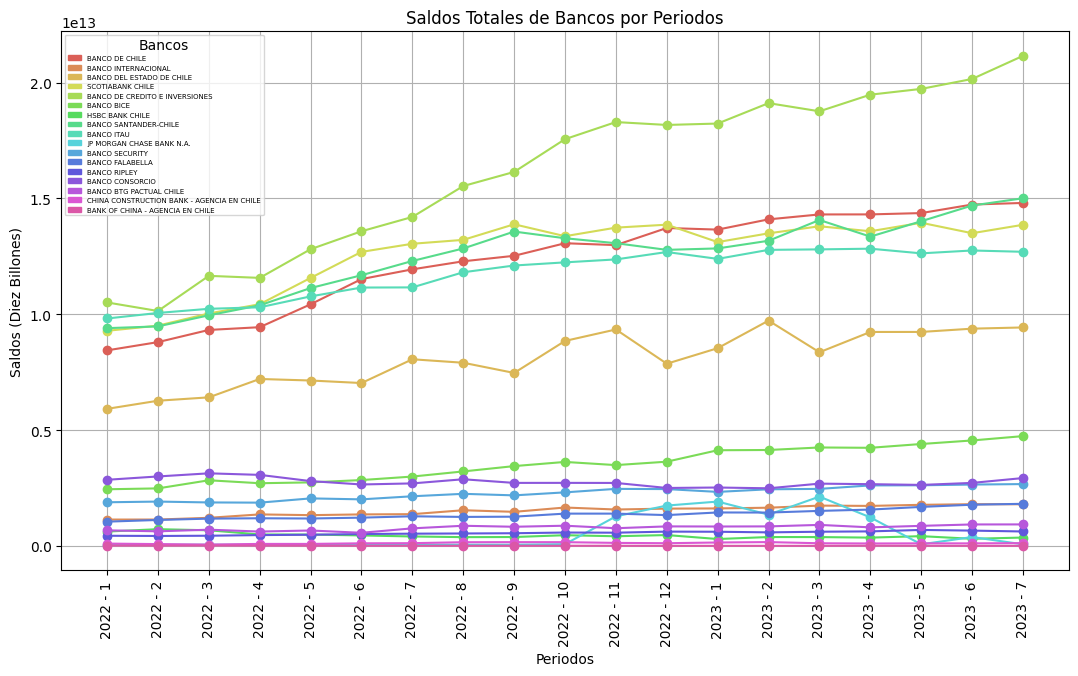

In [7]:
fig = plt.figure(figsize=(13, 7))
palette = sns.color_palette("hls", len(bancos)+1)
colec = []
i = 0
per = [f'{per//100} - {per%100}' for per in df['periodo'].unique()]
for bcn in bancos:
    plt.plot(per, d_bcn[bcn], marker = 'o',  color = palette[i])
    colec.append( mpatches.Patch(color = palette[i], label=bancos[i]))
    i += 1

plt.legend(handles=colec, fontsize="5", title= "Bancos")
plt.title("Saldos Totales de Bancos por Periodos") # agregar titulo
plt.xlabel('Periodos') # nombre eje x
plt.ylabel('Saldos (Diez Billones)') # nombre eje y
plt.xticks(rotation=90);
plt.grid()
plt.show()

###DAP SISTÉMICO

**NOTA.1:** Los datos a continuación están en miles de millones de pesos.

**NOTA.2:** Se agregó una nueva columna que relaciona los DAP con la cantidad de personas.

In [8]:
archivo = '/content/DAP_SISTÉMICO.xlsx'
df = pd.read_excel(archivo, sheet_name='Cuadro').fillna(0)

#Ordenando el Dataframe
df = df.set_axis(pd.array(df.loc[1]), axis=1)
df = df.drop([0, 1],axis=0)
df = df.drop(['Reg','Descripción series'],axis=1)
df = df.replace('na', 1).transpose().reset_index()
df = df.set_axis(['fecha', 'DAP_total', 'personas', 'menos_1_anio','mas_1_anio'], axis=1)
df['prom_DAP_personas'] = df['DAP_total']/df['personas']
df = df[['fecha', 'DAP_total', 'menos_1_anio','mas_1_anio','prom_DAP_personas', 'personas']]
df

,fecha,DAP_total,menos_1_anio,mas_1_anio,prom_DAP_personas,personas
0,2008-01-01,30733.954310,17940.689973,12793.264337,30733.954310,1.000000
1,2008-02-01,31084.988338,16732.261285,14352.727053,31084.988338,1.000000
2,2008-03-01,31511.378449,15402.976529,16108.401920,31511.378449,1.000000
3,2008-04-01,32077.148251,15519.848311,16557.299940,32077.148251,1.000000
4,2008-05-01,32253.867492,15521.195829,16732.671663,32253.867492,1.000000
...,...,...,...,...,...,...
183,2023-04-01,69722.122617,56843.222505,12878.900113,2.288904,30460.918347
184,2023-05-01,69560.841640,57363.419137,12197.422503,2.226413,31243.456944
185,2023-06-01,71474.595091,59744.428695,11730.166396,2.229917,32052.586818
186,2023-07-01,72561.730065,61344.354542,11217.375523,2.241943,32365.561720


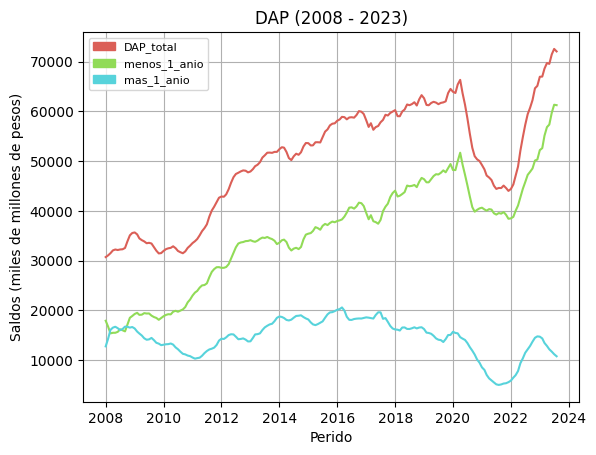

In [9]:
plt.title('DAP (2008 - 2023)')
plt.xlabel('Perido') # nombre eje x
plt.ylabel('Saldos (miles de millones de pesos)') # nombre eje y
palette = sns.color_palette("hls", 4) #Escoger colores

i = 0;
coleccion = []
for datos in df.columns[1:4]: #Agregar cada linea de productos
    sns.lineplot(
        x='fecha',
        y= datos,
        data=df,
        color = palette[i]
        #marker='o'

    )
    coleccion.append(mpatches.Patch(color=palette[i], label=datos))
    i = i+1


plt.legend(handles=coleccion, fontsize="8")
plt.grid()